### Import

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read in data

In [151]:
sat2017 = pd.read_csv(r"~\Desktop\DSI-04\projects\project_1\data\sat_2017.csv")
sat2018 = pd.read_csv(r"~\Desktop\DSI-04\projects\project_1\data\sat_2018.csv")
sat2019 = pd.read_csv(r"~\Desktop\DSI-04\projects\project_1\data\sat_2019.csv")

### Data Preparation

In [153]:
sat2017.rename(columns={'Evidence-Based Reading and Writing':'EBRW'}, inplace=True)
sat2017['sat_year'] = 2017

sat2018.rename(columns={'Evidence-Based Reading and Writing':'EBRW'}, inplace=True)
sat2018['sat_year'] = 2018

sat2019.rename(columns={'Participation Rate':'Participation'}, inplace=True)
sat2019['sat_year'] = 2019

sat_all = pd.concat([sat2017, sat2018, sat2019])
sat_all['Participation'] = sat_all['Participation'].astype(str).str.replace('—', '0').str.replace('%', '')
sat_all['Participation'] = pd.to_numeric(sat_all['Participation']) / 100
sat_all.rename(columns={'Total':'Sat_Score'}, inplace=True)


In [154]:
# Check for null and data types
print(sat_all.dtypes)
print(sat_all.isnull().sum())

State             object
Participation    float64
EBRW               int64
Math               int64
Sat_Score          int64
sat_year           int64
dtype: object
State            0
Participation    0
EBRW             0
Math             0
Sat_Score        0
sat_year         0
dtype: int64


In [155]:
# Only states with data for all three years are included.
state_counts = sat_all['State'].value_counts()
taken_threeyear = state_counts[state_counts == 3].index
sat_all = sat_all[sat_all['State'].isin(taken_threeyear)]


In [267]:
# Grouping to show the mean value of each dimention
sat_all_grouped = sat_all.groupby(['State']).agg({
    'Sat_Score': 'mean',
    'Participation' : 'mean',
}).reset_index()

In [186]:
# Mean of SAT Score
sat_mean = sat_all['Sat_Score'].mean()

In [190]:
# Prepa
sat_less_participate_grouped = sat_all_grouped[sat_all_grouped['Participation'] < 0.4].sort_values(by = 'Sat_Score')

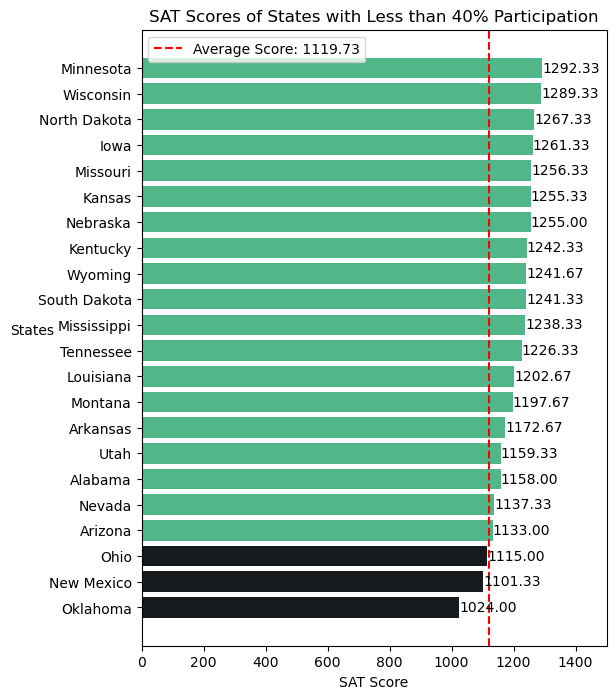

In [194]:
# Set the figure size
plt.figure(figsize=(6, 8))

color = ['#161a1d' if score < sat_mean else '#52b788' for score in sat_less_participate_grouped['Sat_Score']]
# Create a horizontal bar chart
bars = plt.barh(sat_less_participate_grouped['State'], 
                sat_less_participate_grouped['Sat_Score'], 
                color= color)

# Add a vertical line to show the average SAT score
plt.axvline(sat_mean, color='red', linestyle='--', label=f'Average Score: {sat_mean:.2f}')

# Set the labels for the X and Y axes
plt.xlabel('SAT Score')  # X axis
plt.ylabel('States', rotation=0)  # Y axis

# Add data labels for each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             f'{bar.get_width():.2f}', 
             va='center', ha='left')
# Add a legend
plt.legend()
plt.xlim(0,1500)
# Show the title of the chart
plt.title('SAT Scores of States with Less than 40% Participation')

plt.savefig('10Par_Scor.png', dpi=300)  
plt.show()


In [195]:
sat_above_mean_grouped = sat_all_grouped[sat_all_grouped['Sat_Score'] > sat_mean]
sat_above_mean_grouped.shape

(19, 5)

In [196]:
# Create participation_range categories
sat_participation_range['participation_range'] = pd.cut(
    sat_all_grouped['Participation'],
    bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
    labels=['0%-20%', '21%-40%', '41%-60%','61%-80%','81%-100%']
)

# Group by participation_range and calculate mean Sat_Score and count of observations
sat_all_pc_grouped = sat_all_grouped.groupby('participation_range', observed=False).agg(
    Sat_Score=('Sat_Score', 'mean'),
    Sat_Change_OverYear =('Sat_Change_OverYear', 'mean'),
    count=('participation_range', 'count')
).reset_index()
sat_all_pc_grouped['Sat_Score'] = sat_all_pc_grouped['Sat_Score'].fillna(0)

sat_all_pc_grouped

,participation_range,Sat_Score,Sat_Change_OverYear,count
0,0%-20%,1209.883333,-8.775000,20
1,21%-40%,1135.166667,14.500000,2
2,41%-60%,1070.571429,-8.000000,7
3,61%-80%,1073.976190,-7.321429,14
4,81%-100%,1013.583333,-3.375000,8


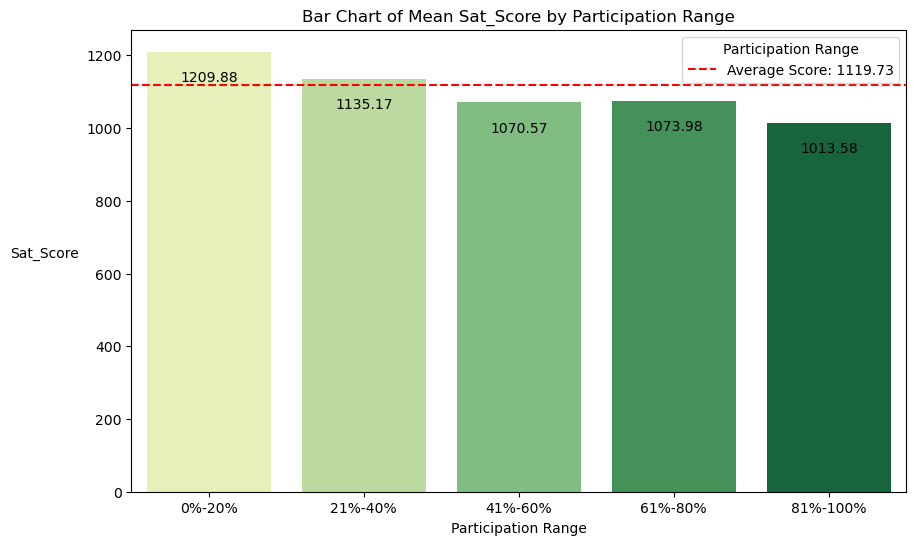

In [199]:

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = sns.barplot(data=sat_all_pc_grouped, x='participation_range', y='Sat_Score', hue='participation_range', palette='YlGn', errorbar=None)

# Set the title and labels
plt.title('Bar Chart of Mean Sat_Score by Participation Range')
plt.xlabel('Participation Range')
plt.ylabel('Mean Sat_Score')

# Add a vertical line to show the average SAT score
plt.axhline(sat_mean, color='red', linestyle='--', label=f'Average Score: {sat_mean:.2f}')
plt.legend(title='Participation Range')

# Add data labels to each bar
for bar in bars.patches:
    height = bar.get_height()
    if height > 0:  # Only display label if height is greater than 0
        plt.text(bar.get_x() + bar.get_width() / 2, 
                 height - 90,  # Adjust position as needed
                 f'{height:.2f}', 
                 va='bottom', ha='center')


# Display the bar chart
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.ylabel('Sat_Score', rotation=0, labelpad=30)  # Y axis

plt.savefig('Bar_MeanScore_byParRange.png', dpi=300)  
plt.show()


In [223]:
sat_all

,State,Participation,EBRW,Math,Sat_Score,sat_year,Sat_Change_OverYear,Participate_Change_OverYear,participation_range
0,Alabama,0.05,593,572,1165,2017,NaN,NaN,0%-10%
1,Alaska,0.38,547,533,1080,2017,NaN,NaN,30%-40%
2,Arizona,0.30,563,553,1116,2017,NaN,NaN,20%-30%
3,Arkansas,0.03,614,594,1208,2017,NaN,NaN,0%-10%
4,California,0.53,531,524,1055,2017,NaN,NaN,50%-60%
...,...,...,...,...,...,...,...,...,...
48,Virginia,0.68,567,551,1119,2019,2.0,0.00,60%-70%
49,Washington,0.70,539,535,1074,2019,-7.0,0.01,60%-70%
50,West Virginia,0.99,483,460,943,2019,-56.0,0.71,90%-100%
51,Wisconsin,0.03,635,648,1283,2019,-11.0,0.00,0%-10%


In [253]:
sat_all

sat_all['participation_range'] = pd.cut(
    sat_all['Participation'],
    bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
    labels=['0%-20%', '21%-40%', '41%-60%', '61%-80%', '81%-100%']
)

sat_all_pc_grouped = sat_all.groupby(['participation_range','sat_year'], observed=False).agg(
    Sat_Score=('Sat_Score', 'mean'),
    count=('participation_range', 'count'),
    Sat_Change_OverYear=('Sat_Change_OverYear', 'mean')
).reset_index()
sat_all_pc_grouped['Sat_Score'] = sat_all_pc_grouped['Sat_Score'].fillna(0)
sat_all_pc_grouped['Sat_Score_Percentage'] = sat_all_pc_grouped['Sat_Score']/16

sat_all_pc_grouped.head()

,participation_range,sat_year,Sat_Score,count,Sat_Change_OverYear,Sat_Score_Percentage
0,0%-20%,2017,1208.913043,23,NaN,75.557065
1,0%-20%,2018,1206.900000,20,-13.25,75.431250
2,0%-20%,2019,1212.250000,20,1.45,75.765625
3,21%-40%,2017,1104.000000,3,NaN,69.000000
4,21%-40%,2018,1096.000000,3,-10.00,68.500000


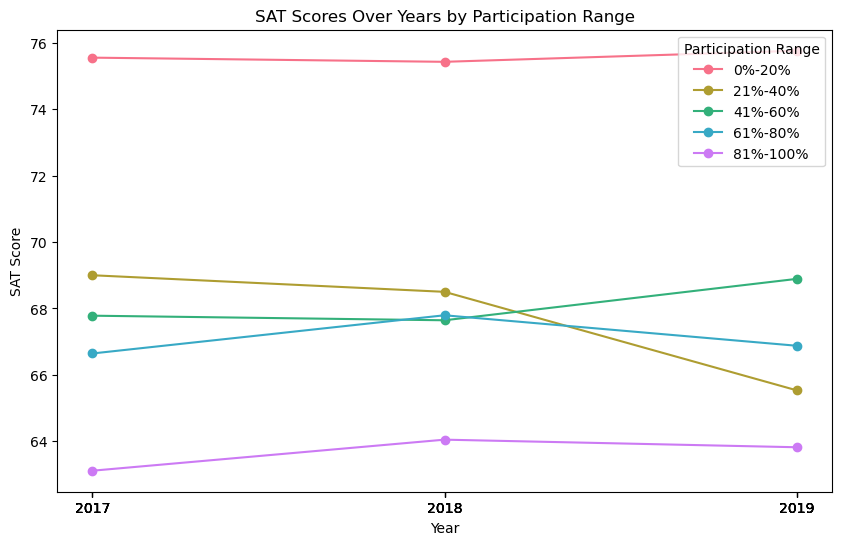

In [265]:
# Set a color palette
colors = sns.color_palette("husl", len(sat_all_pc_grouped['participation_range'].unique()))

# Create a line plot
plt.figure(figsize=(10, 6))

# Loop through each unique participation range and plot with a specific color
for i, participation in enumerate(sat_all_pc_grouped['participation_range'].unique()):
    subset = sat_all_pc_grouped[sat_all_pc_grouped['participation_range'] == participation]
    plt.plot(subset['sat_year'], subset['Sat_Score_Percentage'], marker='o', label=participation, color=colors[i])

# Set the title and labels
plt.title('SAT Scores Over Years by Participation Range')
plt.xticks(ticks=sat_all_pc_grouped['sat_year'], labels=[str(year) for year in sat_all_pc_grouped['sat_year']])
plt.xlabel('Year')

plt.ylabel('SAT Score')

# Optional: Add grid lines for better readability
plt.grid(visible =0)

# Add a legend
plt.legend(title='Participation Range')

# Display the line plot
plt.show()

In [205]:
Mean_2017 = sat_all[sat_all['sat_year'] == 2017]['Sat_Score'].mean()
Mean_2018 = sat_all[sat_all['sat_year'] == 2018]['Sat_Score'].mean()
Mean_2019 = sat_all[sat_all['sat_year'] == 2019]['Sat_Score'].mean()
print(Mean_2017)
print(Mean_2018)
print(Mean_2019)

1126.0980392156862
1120.0196078431372
1113.078431372549


In [207]:

sat_all_outline = sat_all_grouped[(sat_all_grouped['Participation'] < 0.3) & (sat_all_grouped['Sat_Score'] < sat_mean)].sort_values(by = 'Sat_Score')
sat_all_outline

,State,Sat_Score,Sat_Change_OverYear,Participation,Participate_Change_OverYear,participation_range
36,Oklahoma,1024.000000,-42.0,0.123333,0.075,0%-20%
31,New Mexico,1101.333333,-32.5,0.150000,0.035,0%-20%
35,Ohio,1115.000000,-26.0,0.163333,0.035,0%-20%


In [209]:
outline = sat_all[sat_all['State'].isin(sat_all_outline['State'])]
outline

,State,Participation,EBRW,Math,Sat_Score,sat_year,Sat_Change_OverYear,Participate_Change_OverYear
31,New Mexico,0.11,577,561,1138,2017,NaN,NaN
35,Ohio,0.12,578,570,1149,2017,NaN,NaN
36,Oklahoma,0.07,530,517,1047,2017,NaN,NaN
31,New Mexico,0.16,552,540,1093,2018,-45.0,0.05
35,Oklahoma,0.08,541,521,1062,2018,15.0,0.01
36,Ohio,0.18,552,547,1099,2018,-50.0,0.06
31,New Mexico,0.18,543,530,1073,2019,-20.0,0.02
35,Ohio,0.19,550,548,1097,2019,-2.0,0.01
36,Oklahoma,0.22,490,472,963,2019,-99.0,0.14
